In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from ggplot import *
from sklearn import preprocessing

C:\Anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
load_wine()

{'DESCR': 'Wine Data Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- 1) Alcohol\n \t\t- 2) Malic acid\n \t\t- 3) Ash\n\t\t- 4) Alcalinity of ash  \n \t\t- 5) Magnesium\n\t\t- 6) Total phenols\n \t\t- 7) Flavanoids\n \t\t- 8) Nonflavanoid phenols\n \t\t- 9) Proanthocyanins\n\t\t- 10)Color intensity\n \t\t- 11)Hue\n \t\t- 12)OD280/OD315 of diluted wines\n \t\t- 13)Proline\n        \t- class:\n                - class_0\n                - class_1\n                - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80   

In [3]:
#wine is an object of type bunch, which has multiple data types. Essentially, it is a dictionary as we can see below
wine = load_wine()
dataset = wine['data']

#converting numpy array to pandas dataframe
dataset = pd.DataFrame(dataset)
#changing the column names
dataset.columns=wine['feature_names']
dataset.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [101]:
dataset.max(axis=0)

alcohol                           14.83
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
dtype: float64

In [102]:
dataset.min(axis=0)

alcohol                          11.03
malic_acid                        0.74
ash                               1.36
alcalinity_of_ash                10.60
magnesium                        70.00
total_phenols                     0.98
flavanoids                        0.34
nonflavanoid_phenols              0.13
proanthocyanins                   0.41
color_intensity                   1.28
hue                               0.48
od280/od315_of_diluted_wines      1.27
proline                         278.00
dtype: float64

In [103]:
dataset.max(axis=0)-dataset.min(axis=0)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

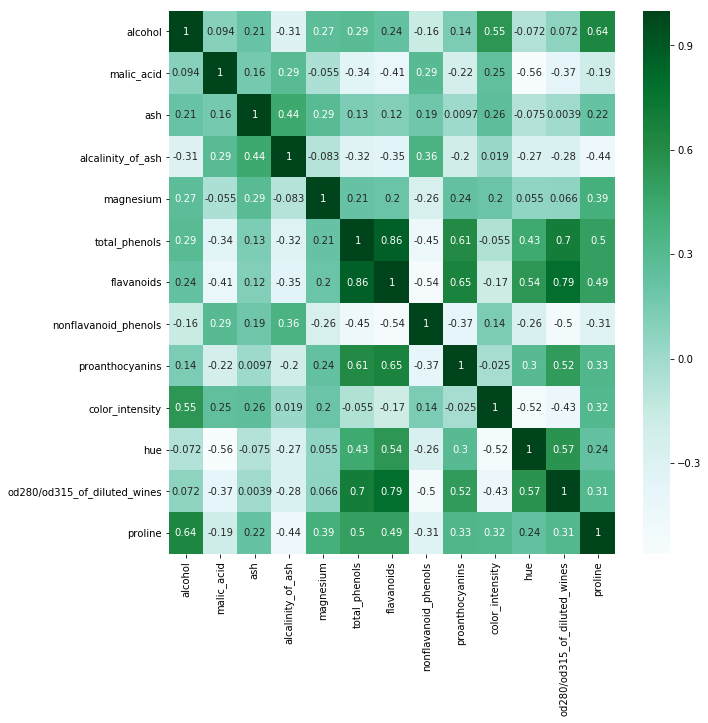

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap='BuGn', annot=True)

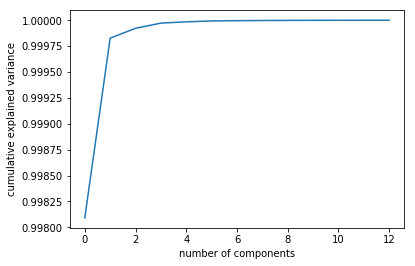

In [8]:
#Without standardization, the number of components needed appear to be 1
pca = PCA().fit(dataset)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [9]:
target = wine['target']
target = pd.DataFrame(target)
dataset = pd.concat([dataset, target], axis=1)

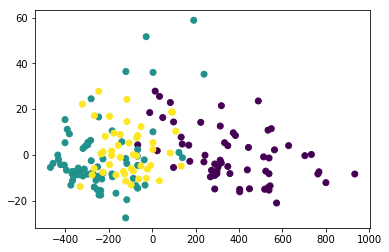

In [10]:
pca = PCA(n_components=2)
pca.fit(dataset)
projected = pca.transform(dataset)
projected = pd.DataFrame(projected, columns=['pc1', 'pc2'])
target = wine['target']
target = pd.Series(target)
projected= pd.concat([projected, target.rename('target')], axis=1)
projected['target'].astype('category')

plt.scatter(x=projected['pc1'], y=projected['pc2'], c=projected['target'])
plt.show()

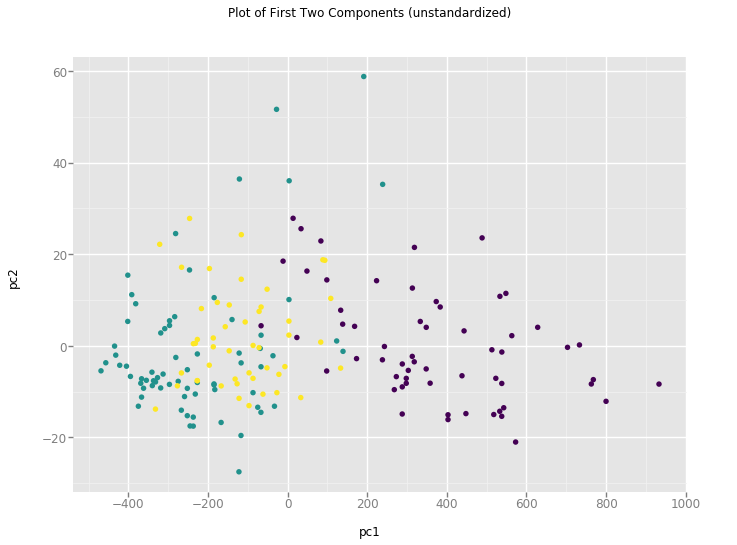

<ggplot: (-9223371931004825116)>

In [68]:
ggplot(projected, aes('pc1', 'pc2'))+geom_point(aes(color='target'), size=30) + \
labs(title='Plot of First Two Components (unstandardized)')

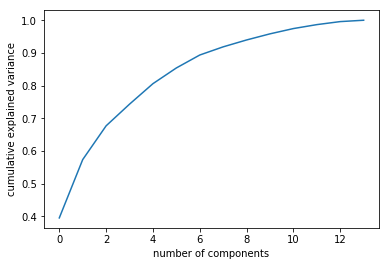

In [11]:
#PCA with standardized data
dataset_standardize = preprocessing.scale(dataset)
pca = PCA().fit(dataset_standardize)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

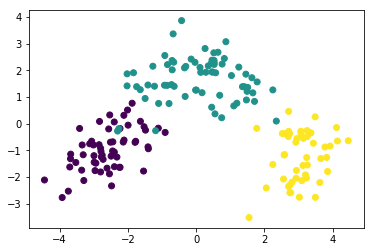

In [15]:
pca = PCA(n_components=2)
pca.fit(dataset_standardize)
projected = pca.transform(dataset_standardize)
projected = pd.DataFrame(projected, columns=['pc1', 'pc2'])
target = wine['target']
target = pd.Series(target)
projected= pd.concat([projected, target.rename('target')], axis=1)


plt.scatter(x=projected['pc1'], y=projected['pc2'], c=projected['target'])
plt.show()
#ggplot(projected, aes('pc1', 'pc2'))+geom_point(aes(color='target'))

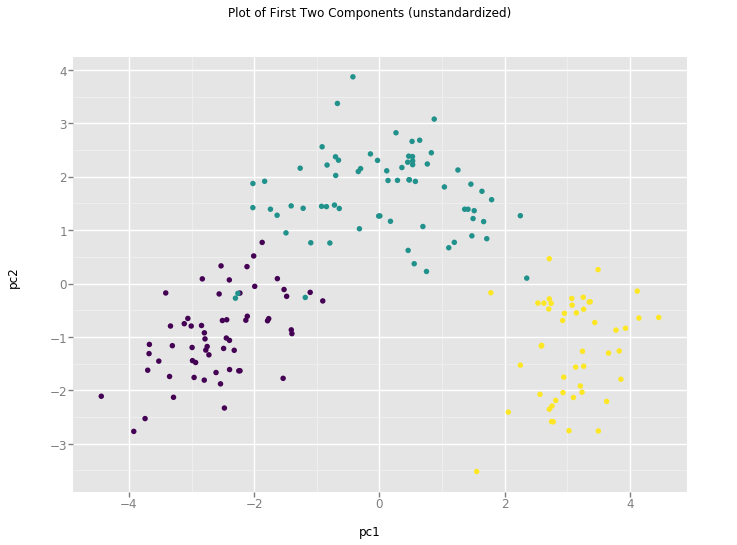

<ggplot: (-9223371929546056027)>

In [16]:
ggplot(projected, aes('pc1', 'pc2'))+geom_point(aes(color='target'), size=30) + \
labs(title='Plot of First Two Components (unstandardized)')